# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Гежин Сергей Андреевич БФИ 2001
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [2]:
import networkx as nx
import numpy as pd
import pandas
import math
import matplotlib.pyplot as plt
import copy
import time
import queue

In [37]:
def read_matrix(file):
    f = open(file, 'r')
    lines = f.readlines()
    N = len(lines)
    D = [0] * N
    for i in range(N):
        D[i] = list(map(int, lines[i].split()))

    return D

def get_edges(D, path):
    edges = []
    labels = {}
    path_edges = [] 
    path_labels =  {}
    
    for i in range(1, len(path)):
        path_edges.append((path[i - 1], path[i]))
    
    for i in range(len(D)):
        for j in range(len(D[i])):
            if D[i][j] > 0:
                if (i+1, j+1) not in path_edges:
                    edges.append((i+1, j+1))
                    labels[(i+1, j+1)] = D[i][j]
                else:
                    path_labels[(i+1, j+1)] = D[i][j]
    return edges, labels, path_edges, path_labels

def draw_graph(D, path):
    N = len(D)
    edges, edge_labels, path_edges, path_edge_labels = get_edges(D, path)
    G = nx.DiGraph()
    node_colors = []
    node_labels = {}
    for i in range(len(D)):
        node_labels[i + 1] = str(i + 1)
        G.add_node(i + 1)
    
    pos = nx.spring_layout(G)
    path_nodes = path
    other_nodes = list(set([i+1 for i in range(N)]) - set(path))
    
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color="tab:orange")
    nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, node_color="tab:blue")
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='white')     

    nx.draw_networkx_edges(G, pos=pos, edgelist=edges)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)    
    
    nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color="tab:orange", arrowsize=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=path_edge_labels)
    
    
    plt.show()

### Алгоритм Флойда-Уоршелла:

Найден оптимальный путь: 1->3
Его длинна равна: 3
--- 0.143 ms ---


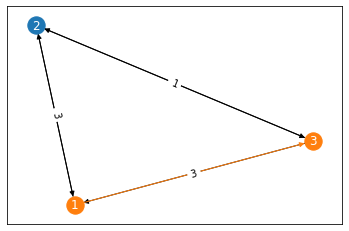

In [50]:
def get_path(P, u, v):
    path = [u]
    while u != start:
        u = P[u][start]
        path.append(u)
    return list(reversed(path))

def prepare_V(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and matrix[i][j] == 0:
                matrix[i][j] = math.inf
    return matrix


def Floyd_Uorshel(V):
    N = len(V)
    P = [[v for v in range(N)] for u in range(N)]

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = V[i][k] + V[k][j]
                if V[i][j] > d:
                    V[i][j] = d
                    P[i][j] = k
    return P, V


file = 'H:/matrix/matrix3.txt'
D = read_matrix(file)
D2 = read_matrix(file)
V = prepare_V(D)

# Нумерация в функциях с нуля
start = 1 - 1
end = 3 - 1

start_time = time.perf_counter() 
P, V = Floyd_Uorshel(V)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

path = get_path(P, end, start)
path2 = get_path(P, end, start)
distance = V[start][end]

for i in range(len(path)):
    path[i] = str(path[i]+1)
for i in range(len(path2)):
    path2[i] = path2[i]+1
    
print('Найден оптимальный путь:' + ' ' + '->'.join(path))
print('Его длинна равна:', str(distance))
print(end_time)

draw_graph(D2, path2)

### Алгоритм Дейкстры

Найден оптимальный путь: 1->3
Его длинна равна: 3
--- 0.254 ms ---


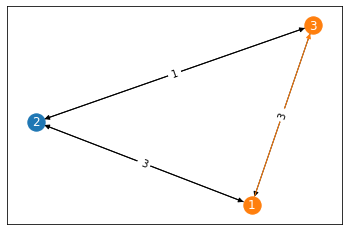

In [51]:
def arg_min(T, S):
    amin = -1
    m = math.inf
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i

    return amin

def get_link_v(v, D):
    for i, weight in enumerate(D[v]):
        if weight > 0:
            yield i

def Dijkstra(start, end, D):
    v = start
    N = len(D)
    T = [math.inf] * N
    links = [''] * N
    links[v] = str(v + 1)
    T[v] = 0
    S = {v}

    while v != -1:
        for i in get_link_v(v, D):
            if i not in S:
                w = T[v] + D[v][i]
                if w < T[i]:
                    T[i] = w
                    links[i] = links[v] + ' ' + str(i + 1)

        v = arg_min(T, S)
        if v >= 0:
            S.add(v)
    return T, links


file = 'H:/matrix/matrix3.txt'
D = read_matrix(file)

# Нумерация в функциях с нуля
start = 1 - 1
end = 3 - 1

start_time = time.perf_counter() 
T, links = Dijkstra(start, end, D)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

path = links[end]
distance = T[end]
print('Найден оптимальный путь:' + ' ' + '->'.join(path.replace(' ', '')))
print('Его длинна равна:', str(distance))
print(end_time)
      
draw_graph(D, list(map(int, path.split())))

### Алгоритм Беллмана-Форда

Найден оптимальный путь: 1->4->6
Его длинна равна: 5
--- 0.845 ms ---


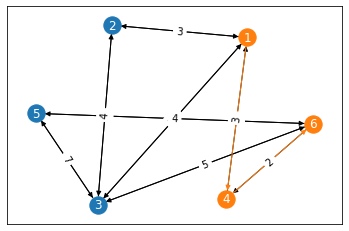

In [57]:
def prepare_matrix(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
    return matrix


def Bellman_Ford(matrix, start, end):
    N = len(matrix)
    
    cycle = False
    
    A = [[math.inf for i in range(N)] for j in range(N)]
    
    P = [[start] for i in range(N)]
    
    A[0][start] = 0
    
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                    
                if A[k][j] > A[k - 1][i] + matrix[i][j]:
                    A[k][j] = A[k - 1][i] + matrix[i][j]
                    
                    P[j] = copy.deepcopy(P[i])
                    
                    P[j].append(j)
                    
    if A[-1] != A[-2]:
        cycle = True
        
    if A[-1][end] == math.inf or len(P[end]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[end]]
        
    return (A[-1], path, P, cycle)

D = read_matrix('H:/matrix/matrix6.txt')
matrix = prepare_matrix(read_matrix('H:/matrix/matrix6.txt'))

# Нумерация в функциях с нуля
start = 1 - 1
end = 6 - 1

start_time = time.perf_counter()
result = Bellman_Ford(matrix, start, end)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

path = result[1]
distance = result[0][end]

print('Найден оптимальный путь:' + ' ' + '->'.join(list(map(str, path))))
print('Его длинна равна:', str(distance))
print(end_time)
      
draw_graph(D, path)
    


### Алгоритм Джонсона

Найден оптимальный путь: 1->4->6
Его длинна равна: 5
--- 0.412 ms ---


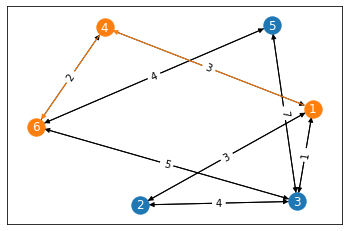

In [58]:
def back_prepare(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == math.inf:
                matrix[i][j] = 0
    return matrix

def Johnson(matrix, start, end):
    
    matrix2 = copy.deepcopy(matrix)
    
    matrix3 = copy.deepcopy(matrix)
    
    N = len(matrix)
    
    for i in range(N):
        matrix2[i].append(math.inf)
        
    matrix2.append([0 for i in range(N + 1)])
    
    Ford_result = Bellman_Ford(matrix2, N, 1)
    
    if Ford_result[3] == True:
        return ([], [], [])
    
    for i in range(N):
        for j in range(N):
            if matrix3[i][j] != math.inf and Ford_result[0][i] != math.inf and Ford_result[0][j] != math.inf:
                matrix3[i][j] += matrix2[0][i] - matrix2[0][j]
    
    distance = []
    path = []
    
    for i in range(N):
        T, links = Dijkstra(i + 1, i + 1, back_prepare(matrix3))
        
        distance.append(T)
        
        path.append(list(map(int, links[i].split())))

    for i in range(N):
        for j in range(N):
            if distance[i][j] != math.inf and matrix2[0][i] != math.inf and matrix2[0][j] != math.inf:
                distance[i][j] += matrix2[0][j] - matrix2[0][i]
    
    return distance, path
    
matrix = prepare_matrix(read_matrix('H:/matrix/matrix6.txt'))

# Нумерация в функциях с нуля
start = 1 - 1
end = 6 - 1

start_time = time.perf_counter()
result = Johnson(matrix, start, end)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

path = result[1]
distance = result[0][end]

print('Найден оптимальный путь:' + ' ' + '->'.join(list(map(str, path))))
print('Его длинна равна:', str(distance))
print(end_time)
      
draw_graph(D, path)

### Алгоритм Левита

Найден оптимальный путь: 1->3->7->10
Его длинна равна: 24
--- 0.723 ms ---


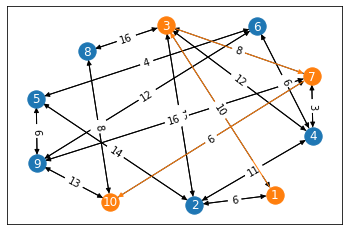

In [79]:
def Levit(M, start, end):
    start -= 1
    end -= 1
    
    matrix = copy.deepcopy(M)    
    N = len(matrix)
    
    paths = [[start] for i in range(N)]    
    distance = [math.inf for i in range(N)]    
    distance[start] = 0    
    
    m0 = set()
    
    m1 = {"Main" : [start], "Urgent": []}
    
    m2 = set(range(N))
    
    m2.remove(start)
    
    while len(m1["Main"]) or len(m1["Urgent"]):
        if len(m1["Urgent"]):
            current = m1["Urgent"].pop(0)
        else:
            current = m1["Main"].pop(0)
        for temp in range(N):
            if distance[temp] == math.inf and matrix[current][temp] == math.inf:
                continue
            if temp in m2:
                m2.remove(temp)
                
                cdistance = distance[current] + matrix[current][temp]
                
                if cdistance < distance[temp]:
                    
                    distance[temp] = cdistance
                    
                    paths[temp] = copy.deepcopy(paths[current])
                    
                    paths[temp].append(temp)                    
                m1["Main"].append(temp)
            elif temp in m1["Main"] or temp in m1["Urgent"]:
                cdistance = distance[current] + matrix[current][temp]
                
                if cdistance < distance[temp]:
                    distance[temp] = cdistance
                    
                    paths[temp] = copy.deepcopy(paths[current])
                    
                    paths[temp].append(temp)
                    
            elif temp in m0 and distance[temp] > distance[current] + matrix[current][temp]:
                m0.remove(temp)
                
                m1["Urgent"].append(temp)
                
                cdistance = distance[current] + matrix[current][temp]
                
                if cdistance < distance[temp]:
                    distance[temp] = cdistance
                    
                    paths[temp] = copy.deepcopy(paths[current])
                    
                    paths[temp].append(temp)
        m0.add(current)
        
    return distance, [el + 1 for el in paths[end]], paths

matrix = prepare_matrix(read_matrix('H:/matrix/matrix10.txt'))
D = read_matrix('H:/matrix/matrix10.txt')

# Нумерация в функциях с нуля
start = 1
end = 10

start_time = time.perf_counter()
result = Levit(matrix, start, end)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

distance = result[0][end - 1]
path = result[1]
    
print('Найден оптимальный путь:' + ' ' + '->'.join(list(map(str, path))))
print('Его длинна равна:', str(distance))
print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))

draw_graph(D, path)

### Алгоритм Йена

Найден оптимальный путь1 : 2->5->6->4->7 ; Его длинна равна: 27
Найден оптимальный путь2 : 2->5->6->4->3->7 ; Его длинна равна: 36
Найден оптимальный путь3 : 2->5->6->4->3->4->7 ; Его длинна равна: 27
Найден оптимальный путь4 : 2->5->6->4->3->8->10->7 ; Его длинна равна: 27
Найден оптимальный путь5 : 2->5->6->4->3->2->5->6->4->7 ; Его длинна равна: 27
Найден оптимальный путь6 : 2->5->6->4->3->8->10->9->7 ; Его длинна равна: 27
--- 4.721 ms ---


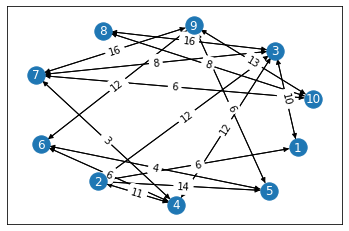

In [100]:
def create_graph(matrix):
    g = nx.DiGraph()
    for i in range(1, len(matrix)):
        g.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                g.add_edge(i+1, j+1, weight=matrix[i][j], label=matrix[i][j])
    return graph

def Yen(graph, start, end, K):
    
    try:
        paths = [nx.dijkstra_path(graph, start, end)]
        
        weights = [nx.dijkstra_path_length(graph, start, end)]
    except BaseException:
        return None, None
    
    PriorityQueue = queue.PriorityQueue()
    for k in range(1, K):
        for i in range(len(paths[k - 1]) - 1):
            node = paths[k - 1][i]
            
            root = paths[k - 1][:i]
            
            removed = []

            for path in paths:
                if len(path) - 1 > i and root == path[:i] and graph.has_edge(path[i], path[i + 1]):
                    edge_weight = graph.edges[path[i], path[i + 1]]['weight']
                    
                    removed.append((path[i], path[i + 1], edge_weight))
                    
                    graph.remove_edge(path[i], path[i + 1])

            if nx.has_path(graph, node, end):
                spur = nx.dijkstra_path(graph, node, end)

                tpath = root + spur
                
                tpath_cost = nx.dijkstra_path_length(graph, tpath[0], tpath[-1])

                PriorityQueue.put((tpath_cost, tpath))

            graph.add_weighted_edges_from(removed)

        while not PriorityQueue.empty():
            cost_, path_ = PriorityQueue.get()
            if path_ not in paths:
                paths.append(path_)
                
                weights.append(cost_)
                
                break

    return paths, weights


matrix = prepare_matrix(read_matrix('H:/matrix/matrix10.txt'))

D = read_matrix('H:/matrix/matrix10.txt')

graph = create_graph(matrix)

path = []

start = 2
end = 7
amount = 6

start_time = time.perf_counter()
paths, weights = Yen(graph, start, end, amount)
end_time = "--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000))

if paths is None or weights is None:
    print("Невозможно добраться от узла", start, "до узла", end) 
else:
    if len(weights) == amount:
        for i in range(amount):
            paths[i] = list(map(str, paths[i]))
            
            print("Найден оптимальный путь{}".format(i+1), ":", '->'.join(paths[i]), "; Его длинна равна:", weights[i])
    else:
        print("Введённое число больше количества возможных путей. Найдено", len(weights))
        for i in range(len(weights)):
            paths[i] = list(map(str, paths[i]))
            
            print("Найден оптимальный путь:", i+1, ":", '->'.join(paths[i]), "; Его длинна равна:", weights[i])

print("--- {:.3f} ms ---".format(((time.perf_counter() - start_time)*1000)))
draw_graph(D, [])

### Вывод

In [3]:
table = [["Алгоритм Флойда-Уоршелла", "0.143 ms", "0.225 ms", "0.508 ms", "12.543 ms"],
        ["Алгоритм Дейкстры", "0.254 ms", "0.292 ms", "0.101 ms", "0.299 ms"],
        ["Алгоритм Беллмана-Форда", "0.239 ms", "0.845 ms", "0.661 ms", "13.248 ms"],
        ["Алгоритм Джонсона", "0.398 ms", "0.458 ms", "1.303 ms", "10.248 ms"],
        ["Алгоритм Левита", "0.809 ms", "1.876 ms", "0.723 ms", "1.875 ms"],
        ["Алгоритм Йена", "0.590 ms", "1.645 ms", "4.721 ms", "22.801 ms"]]
pandas.DataFrame(table, columns=["Алгоритм","3 узла", "6 узлов", "10 узлов",  "30 узлов"])

,Алгоритм,3 узла,6 узлов,10 узлов,30 узлов
0,Алгоритм Флойда-Уоршелла,0.143 ms,0.225 ms,0.508 ms,12.543 ms
1,Алгоритм Дейкстры,0.254 ms,0.292 ms,0.101 ms,0.299 ms
2,Алгоритм Беллмана-Форда,0.239 ms,0.845 ms,0.661 ms,13.248 ms
3,Алгоритм Джонсона,0.398 ms,0.458 ms,1.303 ms,10.248 ms
4,Алгоритм Левита,0.809 ms,1.876 ms,0.723 ms,1.875 ms
5,Алгоритм Йена,0.590 ms,1.645 ms,4.721 ms,22.801 ms


Мы реализовали 6 алгоритмов поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа.
Мы предусмотрели задание графа в виде матрицы смежности, читаемой из файла .txt
Мы разработали графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.
По результатам работы мы проанализировали временную сложность работы заданного алгоритма в зависимости от числа узлов графа. Данные представлены в виде таблицы.
